# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
import os
import glob
import shutil

In [4]:
### Guideline for convenience ###
# 압축 풀기
!unzip -qq "./drive/MyDrive/dsl/animals10.zip"

In [ ]:
!ls

Animals-10  drive  sample_data


In [5]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?
animals = ["butterfly",'cat','chicken','cow','dog','elephant','horse','sheep','spider','squirrel']
for anim in animals:
    animal = sorted(glob.glob(f'./Animals-10/{anim}/*'))
    print(f'name: {anim}\t 개수: {len(animal)}')

name: butterfly	 개수: 2112
name: cat	 개수: 1668
name: chicken	 개수: 3098
name: cow	 개수: 1866
name: dog	 개수: 4863
name: elephant	 개수: 1446
name: horse	 개수: 2623
name: sheep	 개수: 1820
name: spider	 개수: 4821
name: squirrel	 개수: 1862


In [6]:
# test에 넣을 이미지 개수 계산
test_cnt = []
for anim in animals:
    animal = sorted(glob.glob(f'./Animals-10/{anim}/*'))
    test_count = round(len(animal)*0.3)
    test_cnt.append(test_count)
    print(f'name: {anim}\t test 수: {test_count}')

name: butterfly	 test 수: 634
name: cat	 test 수: 500
name: chicken	 test 수: 929
name: cow	 test 수: 560
name: dog	 test 수: 1459
name: elephant	 test 수: 434
name: horse	 test 수: 787
name: sheep	 test 수: 546
name: spider	 test 수: 1446
name: squirrel	 test 수: 559


In [7]:
# train, test 폴더 경로 선언 & 만들기
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [8]:
for anim in animals:
    train_path = f'./train/{anim}'
    test_path = f'./test/{anim}'
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

In [9]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기
for anim in animals:
    train_path = f'./train/{anim}'
    test_path = f'./test/{anim}'
    animal = sorted(glob.glob(f'./Animals-10/{anim}/*'))
    a = round(len(animal)*0.3)
    split(animal,a,train_path,test_path)

train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


In [10]:
for anim in animals:
    train_path = sorted(glob.glob(f'./train/{anim}/*'))
    test_path = sorted(glob.glob(f'./test/{anim}/*'))
    train = len(train_path)
    test = len(test_path)
    total = train+test
    print(f'{anim[:3]}\t train 개수: {train}\ttest개수: {test}\t총: {total}')

but	 train 개수: 1478	test개수: 634	총: 2112
cat	 train 개수: 1168	test개수: 500	총: 1668
chi	 train 개수: 2169	test개수: 929	총: 3098
cow	 train 개수: 1306	test개수: 560	총: 1866
dog	 train 개수: 3404	test개수: 1459	총: 4863
ele	 train 개수: 1012	test개수: 434	총: 1446
hor	 train 개수: 1836	test개수: 787	총: 2623
she	 train 개수: 1274	test개수: 546	총: 1820
spi	 train 개수: 3375	test개수: 1446	총: 4821
squ	 train 개수: 1303	test개수: 559	총: 1862


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [12]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
transform_train = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(30),  
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [13]:
transform_test = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [14]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
train_data = torchvision.datasets.ImageFolder(
    root = './train', # 바로 train 폴더 지정
    transform = transform_train # transform은 그냥 편의상 cifar에서 썼던거 그대로
)
test_data = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_test
)

In [15]:
print(len(train_data),len(test_data))

18325 7854


In [16]:
# train, test에 대해 DataLoader 정의
trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 16,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 16,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

In [17]:
len(trainloader)

1146

In [ ]:
trainloader

In [18]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride = 1, padding=1), # [batch_size,3,224,224] -> [batch_size,32,224,224]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride = 1, padding=1),  # [batch_size,32,224,224] -> [batch_size,32,224,224]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,32,224,224] -> [batch_size,32,112,112]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=2, stride=2, padding=1), # [batch_size,32,112,112] -> [batch_size,32,56,56]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=2, stride=2, padding=1),  # [batch_size,32,56,56] -> [batch_size,32,28,28]
            nn.BatchNorm2d(32),
            nn.ReLU(),   
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),    # 32, 14, 14
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),  # [batch_size,32,14,14] -> [batch_size,32,14,14]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),  # [batch_size,32,14,14] -> [batch_size,32,14,14]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2)                              # [batch_size,32,14,14] -> [batch_size,32,7,7]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32*7*7,100),                                                # [batch_size,32*7*7] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
from torchsummary import summary
test_model = MyModel() # 모델 객체 선언
summary(test_model, (3,224,224), batch_size=16)

RuntimeError: ignored

In [19]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [26]:
# 모델 객체 선언
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): Dropout(p=0.2, inplace=False)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(32, 32, kernel_size=

In [27]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001) 

In [28]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [23]:
# train 함수 정의
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [24]:
# test 함수 정의
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [29]:
# training
num_epoch = 50
for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 1.9781371470292408

Current batch: 600
Average train loss of recent 300 batches: 1.7287604860464731

Current batch: 900
Average train loss of recent 300 batches: 1.618582063317299

Total train accuarcy: 39.86357435197817
Total train loss: 1.7241366910268707

[ Test epoch: 1 ]

Test accuarcy: 46.58772599949071
Test average loss: 1.5647484424643507

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 1.4708119682470957

Current batch: 600
Average train loss of recent 300 batches: 1.3943337879578273

Current batch: 900
Average train loss of recent 300 batches: 1.3815425010522207

Total train accuarcy: 51.84720327421555
Total train loss: 1.3961592069054982

[ Test epoch: 2 ]

Test accuarcy: 53.01757066462949
Test average loss: 1.3715255894449723

[ Train epoch: 3 ]

Current batch: 300
Average train loss of recent 300 batches: 1.2680657853682835

Current batch: 600
Average train lo

In [30]:
import matplotlib.pyplot as plt

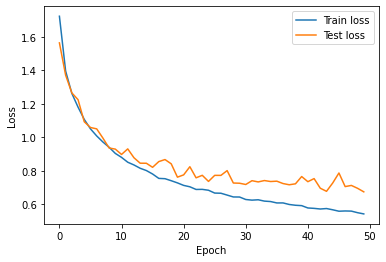

In [31]:
# loss, accuracy 추이 확인 with plt.plot
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

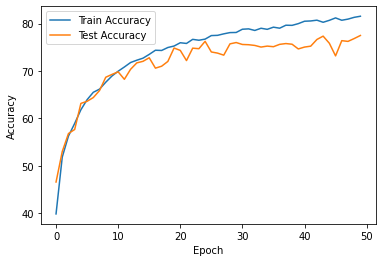

In [32]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()